In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')
from xgboost import XGBRegressor,XGBClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('after_prepros_get_score1.csv')


df_data = pd.read_csv('data_53.csv')


del df['Unnamed: 0']
del df_data['Unnamed: 0']



In [3]:
df_data = df_data[['cor_name','first_p']]
merge_data = df.merge(df_data,on='cor_name')

#시기 

In [4]:
merge_data

,cor_name,cor_rate,obligation,market_type,listed_date,offer_price,sicho_p,profit_percent,sales,profit,...,subs_day,l_exp_offer_price,h_exp_offer_price,score,nasdaq_score,range,Quater_per,search_amt,grade,first_p
0,에이치와이티씨,1480.78,6.08,0,20220809,15000,14700,-2.00,35745.00,7479.0,...,2022-07-29,13000,15000,0.35,-0.001,1037,0.600,0.543000,1,15850
1,새빗켐,1670.90,37.70,0,20220804,35000,70000,100.00,33389.00,4423.0,...,2022-07-27,25000,30000,0.42,0.026,1036,0.600,1.015000,12,72500
2,에이프릴바이오,14.43,10.66,0,20220728,16000,19500,21.88,153762.78,-10220.0,...,2022-07-20,20000,23000,0.62,0.041,1032,0.600,0.185000,4,21850
3,아이씨에이치,57.28,12.47,0,20220729,34000,30600,-10.00,24167.00,2428.0,...,2022-07-20,34000,44000,0.46,0.011,1034,0.600,0.435000,1,27000
4,성일하이텍,2269.68,38.66,0,20220728,50000,99900,99.80,65939.00,-2998.0,...,2022-07-19,40700,47500,0.37,0.041,1033,0.600,0.270000,11,88200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,코디에스,1316.00,7.80,0,20100105,6000,9300,55.00,18010.00,1493.0,...,2009-12-23,5000,6000,0.64,0.017,221,0.520,0.070957,7,7910
680,아이티엑스시큐리티,1296.00,10.50,0,20091222,6000,7400,23.33,46568.00,4416.0,...,2009-12-15,6500,8000,0.22,0.012,217,0.455,0.063650,4,8510
681,위메이드엔터테인먼트,1269.00,4.30,0,20091218,62000,57000,-8.06,73850.00,24600.0,...,2009-12-10,60000,65000,0.31,-0.012,216,0.455,0.032670,1,50700
682,KPX라이프사이언스,524.80,11.46,0,20091222,6200,7600,22.58,46493.00,6609.0,...,2009-12-11,5000,6500,0.41,0.012,219,0.455,0.063650,4,6460


In [5]:
spac_idx = merge_data[merge_data['h_exp_offer_price']=='-'].index
merge_data.drop(spac_idx,inplace = True)


In [6]:
merge_data.reset_index(drop=True,inplace=True)

In [7]:
merge_data['h_exp_offer_price'] = merge_data['h_exp_offer_price'].astype('int64')
merge_data

,cor_name,cor_rate,obligation,market_type,listed_date,offer_price,sicho_p,profit_percent,sales,profit,...,subs_day,l_exp_offer_price,h_exp_offer_price,score,nasdaq_score,range,Quater_per,search_amt,grade,first_p
0,에이치와이티씨,1480.78,6.08,0,20220809,15000,14700,-2.00,35745.00,7479.0,...,2022-07-29,13000,15000,0.35,-0.001,1037,0.600,0.543000,1,15850
1,새빗켐,1670.90,37.70,0,20220804,35000,70000,100.00,33389.00,4423.0,...,2022-07-27,25000,30000,0.42,0.026,1036,0.600,1.015000,12,72500
2,에이프릴바이오,14.43,10.66,0,20220728,16000,19500,21.88,153762.78,-10220.0,...,2022-07-20,20000,23000,0.62,0.041,1032,0.600,0.185000,4,21850
3,아이씨에이치,57.28,12.47,0,20220729,34000,30600,-10.00,24167.00,2428.0,...,2022-07-20,34000,44000,0.46,0.011,1034,0.600,0.435000,1,27000
4,성일하이텍,2269.68,38.66,0,20220728,50000,99900,99.80,65939.00,-2998.0,...,2022-07-19,40700,47500,0.37,0.041,1033,0.600,0.270000,11,88200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,코디에스,1316.00,7.80,0,20100105,6000,9300,55.00,18010.00,1493.0,...,2009-12-23,5000,6000,0.64,0.017,221,0.520,0.070957,7,7910
678,아이티엑스시큐리티,1296.00,10.50,0,20091222,6000,7400,23.33,46568.00,4416.0,...,2009-12-15,6500,8000,0.22,0.012,217,0.455,0.063650,4,8510
679,위메이드엔터테인먼트,1269.00,4.30,0,20091218,62000,57000,-8.06,73850.00,24600.0,...,2009-12-10,60000,65000,0.31,-0.012,216,0.455,0.032670,1,50700
680,KPX라이프사이언스,524.80,11.46,0,20091222,6200,7600,22.58,46493.00,6609.0,...,2009-12-11,5000,6500,0.41,0.012,219,0.455,0.063650,4,6460


In [8]:
merge_data['offer_label'] = 0
merge_data.loc[merge_data['h_exp_offer_price'] < merge_data['offer_price'],'offer_label'] = 1
merge_data.loc[merge_data['h_exp_offer_price'] == merge_data['offer_price'],'offer_label'] = 1

merge_data.drop(['h_exp_offer_price','l_exp_offer_price'],axis=1,inplace=True) # 공모가가 희망공모가 최고랑 같으면 1 , 그렇지 않으면 0



In [9]:
df = merge_data
df.columns

Index(['cor_name', 'cor_rate', 'obligation', 'market_type', 'listed_date',
       'offer_price', 'sicho_p', 'profit_percent', 'sales', 'profit',
       'shares_to_pub', 'sub_rate', 'pre_demand_day', 'subs_day', 'score',
       'nasdaq_score', 'range', 'Quater_per', 'search_amt', 'grade', 'first_p',
       'offer_label'],
      dtype='object')

In [10]:
df['listed_date'] = pd.to_datetime(df['listed_date'], format='%Y%m%d')


In [11]:
df = df.sort_values(by='listed_date',ascending=True).reset_index(drop=True)

In [12]:
df['Year'] = df['listed_date'].dt.year 
df['Month'] = df['listed_date'].dt.month 

In [13]:
del df['listed_date']
del df['pre_demand_day']
del df['subs_day']
del df['grade']

In [14]:
df = df.dropna(subset=['shares_to_pub'])

In [15]:
df

,cor_name,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,sub_rate,score,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month
0,위메이드엔터테인먼트,1269.00,4.30,0,62000,57000,-8.06,73850.00,24600.0,1.00,5.63,0.31,-0.012,216,0.455,0.032670,50700,0,2009,12
1,동양피엔에프,47.00,10.52,0,12000,17000,41.67,36691.00,4334.0,1.00,373.92,0.53,0.012,218,0.455,0.052222,14450,1,2009,12
2,KPX라이프사이언스,524.80,11.46,0,6200,7600,22.58,46493.00,6609.0,1.00,252.62,0.41,0.012,219,0.455,0.063650,6460,0,2009,12
3,아이티엑스시큐리티,1296.00,10.50,0,6000,7400,23.33,46568.00,4416.0,1.00,413.00,0.22,0.012,217,0.455,0.063650,8510,0,2009,12
4,코디에스,1316.00,7.80,0,6000,9300,55.00,18010.00,1493.0,1.00,953.00,0.64,0.017,221,0.520,0.070957,7910,1,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,성일하이텍,2269.68,38.66,0,50000,99900,99.80,65939.00,-2998.0,1.00,1207.10,0.37,0.041,1033,0.600,0.270000,88200,1,2022,7
678,에이프릴바이오,14.43,10.66,0,16000,19500,21.88,153762.78,-10220.0,1.00,4.76,0.62,0.041,1032,0.600,0.185000,21850,0,2022,7
679,아이씨에이치,57.28,12.47,0,34000,30600,-10.00,24167.00,2428.0,0.88,2.51,0.46,0.011,1034,0.600,0.435000,27000,0,2022,7
680,새빗켐,1670.90,37.70,0,35000,70000,100.00,33389.00,4423.0,0.84,1724.96,0.42,0.026,1036,0.600,1.015000,72500,1,2022,8


In [16]:
# df.to_csv('data_set.csv')

In [17]:
# df = df.drop('cor_name',axis=1)

In [18]:
spac_idx = df[df['first_p']=='-'].index
df.drop(spac_idx,inplace = True)


In [19]:
idx = df.index

In [20]:
df['first_p'] = df['first_p'].astype('int')
df['PlusMinusLabel'] = 1
df.loc[df['profit_percent'] <= 0,'PlusMinusLabel'] = 0

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df_copy = df.copy()
df = df.drop('cor_name',axis=1)
scaler=MinMaxScaler()

In [22]:
col = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=col)
print(df.head())

   cor_rate  obligation  market_type  offer_price   sicho_p  profit_percent  \
0  0.558978    0.046137          0.0     0.321675  0.280848        0.019678   
1  0.020414    0.112876          0.0     0.056704  0.078981        0.390355   
2  0.230992    0.122961          0.0     0.025967  0.031542        0.248062   
3  0.570877    0.112661          0.0     0.024907  0.030532        0.253652   
4  0.579691    0.083691          0.0     0.024907  0.040121        0.489714   

      sales    profit  shares_to_pub  sub_rate     score  nasdaq_score  \
0  0.011913  0.239388            1.0  0.000068  0.227941      0.270833   
1  0.005917  0.194989            1.0  0.004673  0.389706      0.437500   
2  0.007498  0.199973            1.0  0.003156  0.301471      0.437500   
3  0.007511  0.195168            1.0  0.005162  0.161765      0.437500   
4  0.002902  0.188765            1.0  0.011914  0.470588      0.472222   

      range  Quater_per  search_amt   first_p  offer_label      Year  Month  \
0

In [23]:

# df.loc[df['profit_percent']> 10,'PlusMinusLabel'] = 2

In [24]:
# df['profit'] = df['profit']-df['sales']

In [25]:
x = df[["cor_rate", "obligation","profit","sub_rate","offer_label","score","shares_to_pub","Year","Month","nasdaq_score","Quater_per","search_amt"]]

y = df["sicho_p"]

In [26]:
df

,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,sub_rate,score,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel
0,0.558978,0.046137,0.0,0.321675,0.280848,0.019678,0.011913,0.239388,1.000000,0.000068,0.227941,0.270833,0.000000,0.455,0.220373,0.296440,0.0,0.000000,1.000000,0.0
1,0.020414,0.112876,0.0,0.056704,0.078981,0.390355,0.005917,0.194989,1.000000,0.004673,0.389706,0.437500,0.002436,0.455,0.235891,0.079569,1.0,0.000000,1.000000,1.0
2,0.230992,0.122961,0.0,0.025967,0.031542,0.248062,0.007498,0.199973,1.000000,0.003156,0.301471,0.437500,0.003654,0.455,0.244960,0.031768,0.0,0.000000,1.000000,1.0
3,0.570877,0.112661,0.0,0.024907,0.030532,0.253652,0.007511,0.195168,1.000000,0.005162,0.161765,0.437500,0.001218,0.455,0.244960,0.044032,0.0,0.000000,1.000000,1.0
4,0.579691,0.083691,0.0,0.024907,0.040121,0.489714,0.002902,0.188765,1.000000,0.011914,0.470588,0.472222,0.006090,0.520,0.250759,0.040443,1.0,0.076923,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1.000000,0.414807,0.0,0.258082,0.497350,0.823643,0.010637,0.178926,1.000000,0.015091,0.272059,0.638889,0.995128,0.600,0.408730,0.520790,1.0,1.000000,0.545455,1.0
671,0.006060,0.114378,0.0,0.077901,0.091597,0.242844,0.024810,0.163104,1.000000,0.000057,0.455882,0.638889,0.993910,0.600,0.341270,0.123841,0.0,1.000000,0.545455,1.0
672,0.024945,0.133798,0.0,0.173291,0.147615,0.005218,0.003895,0.190813,0.980738,0.000029,0.338235,0.430556,0.996346,0.600,0.539683,0.154652,0.0,1.000000,0.545455,0.0
673,0.736104,0.404506,0.0,0.178590,0.346455,0.825134,0.005384,0.195184,0.974318,0.021566,0.308824,0.534722,0.998782,0.600,1.000000,0.426862,1.0,1.000000,0.636364,1.0


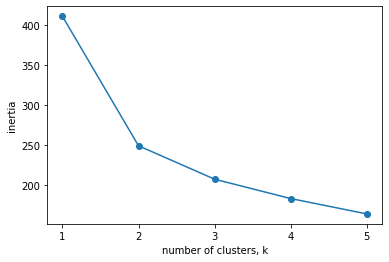

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
ks = range(1,6)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(x) # tsne한 놈
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [28]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters,random_state=42)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
# kmeans.fit(tsne_features) # 축소된놈 Fitting
kmeans.fit(x) # 축소 안한놈 Fitting
# kmeans.fit(features_kpca)

# y_kmeans = kmeans.predict(tsne_features)
y_kmeans = kmeans.predict(x)
# y_kmeans = kmeans.predict(features_kpca)

y_kmeans[0:10] # 군집화 된 결과



array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [29]:
import time
from sklearn.manifold import TSNE

n_sne = x.shape[0]

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=32, n_iter=1000,random_state=0,angle=0.5)
tsne_results = tsne.fit_transform(x)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start ))

[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 675 samples in 0.000s...
[t-SNE] Computed neighbors for 675 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 675 / 675
[t-SNE] Mean sigma: 0.231003
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.687111
[t-SNE] KL divergence after 1000 iterations: 0.492715
t-SNE done! Time elapsed: 1.3454968929290771 seconds


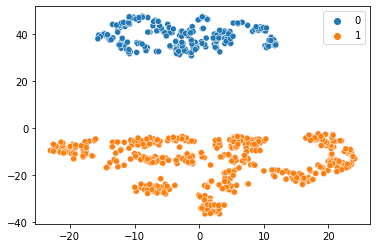

In [30]:
#  1=red=아래군집 , 2=blue=위에군집
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y_kmeans, s=20, cmap='bwr')


sns.scatterplot(tsne_results[:,0], tsne_results[:,1],data=df,hue=y_kmeans,cmap='bwr')
plt.show()



In [31]:
df_copy['cluster'] = y_kmeans
df_copy

,cor_name,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,...,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel,cluster
0,위메이드엔터테인먼트,1269.00,4.30,0,62000,57000,-8.06,73850.00,24600.0,1.00,...,-0.012,216,0.455,0.032670,50700,0,2009,12,0,0
1,동양피엔에프,47.00,10.52,0,12000,17000,41.67,36691.00,4334.0,1.00,...,0.012,218,0.455,0.052222,14450,1,2009,12,1,1
2,KPX라이프사이언스,524.80,11.46,0,6200,7600,22.58,46493.00,6609.0,1.00,...,0.012,219,0.455,0.063650,6460,0,2009,12,1,0
3,아이티엑스시큐리티,1296.00,10.50,0,6000,7400,23.33,46568.00,4416.0,1.00,...,0.012,217,0.455,0.063650,8510,0,2009,12,1,0
4,코디에스,1316.00,7.80,0,6000,9300,55.00,18010.00,1493.0,1.00,...,0.017,221,0.520,0.070957,7910,1,2010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,성일하이텍,2269.68,38.66,0,50000,99900,99.80,65939.00,-2998.0,1.00,...,0.041,1033,0.600,0.270000,88200,1,2022,7,1,1
678,에이프릴바이오,14.43,10.66,0,16000,19500,21.88,153762.78,-10220.0,1.00,...,0.041,1032,0.600,0.185000,21850,0,2022,7,1,0
679,아이씨에이치,57.28,12.47,0,34000,30600,-10.00,24167.00,2428.0,0.88,...,0.011,1034,0.600,0.435000,27000,0,2022,7,0,0
680,새빗켐,1670.90,37.70,0,35000,70000,100.00,33389.00,4423.0,0.84,...,0.026,1036,0.600,1.015000,72500,1,2022,8,1,1


# 

In [32]:
cluster_1 = df_copy[df_copy['cluster']==1]
cluster_0 = df_copy[df_copy['cluster']==0]
cluster_1

,cor_name,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,...,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel,cluster
1,동양피엔에프,47.00,10.52,0,12000,17000,41.67,36691.0,4334.0,1.00,...,0.012,218,0.455,0.052222,14450,1,2009,12,1,1
4,코디에스,1316.00,7.80,0,6000,9300,55.00,18010.0,1493.0,1.00,...,0.017,221,0.520,0.070957,7910,1,2010,1,1,1
10,에이치디시에스,528.00,5.58,0,15000,18500,23.33,114876.0,13788.0,1.00,...,0.011,230,0.520,0.063650,15750,1,2010,2,1,1
11,모베이스,11.00,11.46,0,13200,17000,28.79,103341.0,7703.0,1.00,...,0.000,231,0.520,0.063650,14900,1,2010,2,1,1
14,하이소닉,1090.00,10.46,0,13000,14200,9.23,36070.0,4002.0,1.00,...,-0.007,235,0.520,0.013911,12500,1,2010,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,영창케미칼,1616.27,5.92,0,18600,18400,-1.08,60760.0,2506.0,0.83,...,-0.002,1029,0.600,-0.001000,16450,1,2022,7,0,1
675,에이치피에스피,1511.36,42.54,0,25000,50000,100.00,61174.0,17658.0,1.00,...,0.000,1030,0.600,0.097000,43250,1,2022,7,1,1
677,성일하이텍,2269.68,38.66,0,50000,99900,99.80,65939.0,-2998.0,1.00,...,0.041,1033,0.600,0.270000,88200,1,2022,7,1,1
680,새빗켐,1670.90,37.70,0,35000,70000,100.00,33389.0,4423.0,0.84,...,0.026,1036,0.600,1.015000,72500,1,2022,8,1,1


In [33]:
cluster_0

,cor_name,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,...,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel,cluster
0,위메이드엔터테인먼트,1269.00,4.30,0,62000,57000,-8.06,73850.00,24600.0,1.00,...,-0.012,216,0.455,0.032670,50700,0,2009,12,0,0
2,KPX라이프사이언스,524.80,11.46,0,6200,7600,22.58,46493.00,6609.0,1.00,...,0.012,219,0.455,0.063650,6460,0,2009,12,1,0
3,아이티엑스시큐리티,1296.00,10.50,0,6000,7400,23.33,46568.00,4416.0,1.00,...,0.012,217,0.455,0.063650,8510,0,2009,12,1,0
5,승화엘엠씨,18.48,10.86,0,6700,8800,31.34,29006.00,1818.0,1.00,...,0.000,222,0.520,-0.026625,7480,0,2010,1,1,0
6,우노앤컴퍼니,407.00,8.00,0,6500,5850,-10.00,15677.00,4710.0,1.00,...,0.004,223,0.520,0.032670,6720,0,2010,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,비플라이소프트,111.05,0.76,0,10000,10500,5.00,24386.00,-3424.0,0.90,...,0.014,1023,0.300,0.110000,9050,0,2022,6,1,0
671,보로노이,28.35,9.48,0,40000,36000,-10.00,6180.00,-26491.0,1.00,...,0.016,1026,0.300,0.176000,29350,0,2022,6,0,0
676,루닛,7.10,1.65,0,30000,30800,2.67,1430.00,-83739.0,1.00,...,0.016,1031,0.600,0.282000,40000,0,2022,7,1,0
678,에이프릴바이오,14.43,10.66,0,16000,19500,21.88,153762.78,-10220.0,1.00,...,0.041,1032,0.600,0.185000,21850,0,2022,7,1,0


<AxesSubplot:>

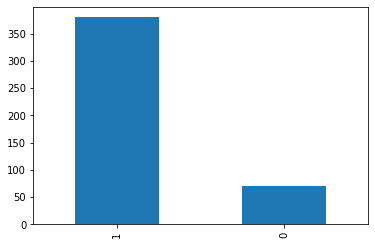

In [34]:
cluster_1['PlusMinusLabel'].value_counts().plot(kind='bar')

<AxesSubplot:>

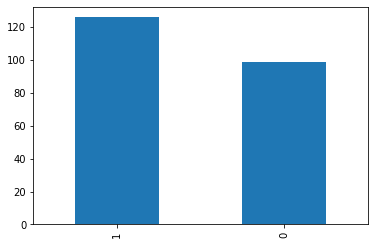

In [36]:
cluster_0['PlusMinusLabel'].value_counts().plot(kind='bar')

In [37]:
print('cluster_1')
print(f'음의 비율 = {round(cluster_1["PlusMinusLabel"].value_counts()[0]/len(cluster_1)* 100,3)}%')
print(f'양의 비율 = {round(cluster_1["PlusMinusLabel"].value_counts()[1]/len(cluster_1)*100,3)}%')


cluster_1
음의 비율 = 15.556%
양의 비율 = 84.444%


In [38]:
print('cluster_0')
print(f'음의 비율 = {round(cluster_0["PlusMinusLabel"].value_counts()[0]/len(cluster_0) * 100,3)}%')
print(f'양의 비율 = {round(cluster_0["PlusMinusLabel"].value_counts()[1]/len(cluster_0) * 100,3)}%')


cluster_0
음의 비율 = 44.0%
양의 비율 = 56.0%


In [39]:
cluster_0.to_csv('cluster0.csv')

In [40]:
# cluster_1.to_csv('cluster1.csv')
cluster_1

,cor_name,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,...,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel,cluster
1,동양피엔에프,47.00,10.52,0,12000,17000,41.67,36691.0,4334.0,1.00,...,0.012,218,0.455,0.052222,14450,1,2009,12,1,1
4,코디에스,1316.00,7.80,0,6000,9300,55.00,18010.0,1493.0,1.00,...,0.017,221,0.520,0.070957,7910,1,2010,1,1,1
10,에이치디시에스,528.00,5.58,0,15000,18500,23.33,114876.0,13788.0,1.00,...,0.011,230,0.520,0.063650,15750,1,2010,2,1,1
11,모베이스,11.00,11.46,0,13200,17000,28.79,103341.0,7703.0,1.00,...,0.000,231,0.520,0.063650,14900,1,2010,2,1,1
14,하이소닉,1090.00,10.46,0,13000,14200,9.23,36070.0,4002.0,1.00,...,-0.007,235,0.520,0.013911,12500,1,2010,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,영창케미칼,1616.27,5.92,0,18600,18400,-1.08,60760.0,2506.0,0.83,...,-0.002,1029,0.600,-0.001000,16450,1,2022,7,0,1
675,에이치피에스피,1511.36,42.54,0,25000,50000,100.00,61174.0,17658.0,1.00,...,0.000,1030,0.600,0.097000,43250,1,2022,7,1,1
677,성일하이텍,2269.68,38.66,0,50000,99900,99.80,65939.0,-2998.0,1.00,...,0.041,1033,0.600,0.270000,88200,1,2022,7,1,1
680,새빗켐,1670.90,37.70,0,35000,70000,100.00,33389.0,4423.0,0.84,...,0.026,1036,0.600,1.015000,72500,1,2022,8,1,1


In [41]:
cluster_1.describe()

,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,sub_rate,...,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel,cluster
count,450.000000,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.0,450.000000,450.000000,450.000000,450.0
mean,762.796911,17.010044,0.0,17786.911111,25218.477778,48.754289,56993.117511,4155.602405,0.926489,1093.375178,...,-0.000596,652.191111,0.548276,0.041349,24912.455556,1.0,2016.588889,7.415556,0.844444,1.0
std,511.399540,15.729139,0.0,14773.492937,19159.216527,39.773087,81529.526562,10599.496751,0.320448,3812.930124,...,0.013063,238.619310,0.271217,0.155367,19403.819666,0.0,3.790430,3.520633,0.362837,0.0
min,1.950000,0.020000,0.0,1600.000000,1800.000000,-10.700000,29.000000,-84669.000000,-5.230000,0.430000,...,-0.051000,218.000000,0.000000,-0.245000,1530.000000,1.0,2009.000000,1.000000,0.000000,1.0
25%,345.440000,6.285000,0.0,8000.000000,11675.000000,11.542500,16217.750000,1709.750000,1.000000,512.930000,...,-0.005000,437.500000,0.333000,-0.033000,11425.000000,1.0,2013.250000,5.000000,1.000000,1.0
50%,723.480000,11.585000,0.0,13550.000000,20000.000000,45.830000,34955.000000,3706.500000,1.000000,796.635000,...,0.000000,666.000000,0.500000,0.027000,18900.000000,1.0,2017.000000,8.000000,1.000000,1.0
75%,1134.005000,23.732500,0.0,22900.000000,32000.000000,100.000000,61110.000000,6625.000000,1.000000,1149.297500,...,0.005000,872.500000,0.750000,0.069750,31375.000000,1.0,2020.000000,11.000000,1.000000,1.0
max,2269.680000,86.160000,0.0,110000.000000,110000.000000,123.460000,882043.000000,67061.000000,1.000000,79976.000000,...,0.053000,1037.000000,1.000000,1.015000,114500.000000,1.0,2022.000000,12.000000,1.000000,1.0


In [42]:
cluster_0.describe()

,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,sub_rate,...,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel,cluster
count,225.000000,225.000000,225.0,225.000000,225.000000,225.000000,2.250000e+02,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.0,225.000000,225.000000,225.000000,225.0
mean,211.873333,11.150667,0.0,14564.444444,16132.244444,14.653600,9.199465e+04,4613.964672,0.944933,225.473067,...,0.002098,621.200000,0.475769,0.027374,15393.844444,0.0,2016.075556,8.337778,0.560000,0.0
std,320.114374,13.451353,0.0,18479.925831,20498.480409,29.020207,4.164601e+05,27848.437367,0.143394,303.780336,...,0.013863,228.860297,0.253206,0.124102,18551.781760,0.0,3.627595,3.598319,0.497494,0.0
min,0.680000,0.000000,0.0,1300.000000,1350.000000,-10.000000,7.100000e+01,-83739.000000,0.030000,0.190000,...,-0.038000,216.000000,0.000000,-0.228000,1150.000000,0.0,2009.000000,1.000000,0.000000,0.0
25%,30.870000,2.880000,0.0,6000.000000,7000.000000,-8.600000,1.776900e+04,859.000000,1.000000,6.840000,...,-0.004000,438.000000,0.333000,-0.036000,6560.000000,0.0,2013.000000,6.000000,0.000000,0.0
50%,74.590000,9.480000,0.0,10000.000000,11500.000000,4.000000,4.112200e+04,4343.000000,1.000000,48.240000,...,0.001000,623.000000,0.455000,0.025000,11150.000000,0.0,2016.000000,10.000000,1.000000,0.0
75%,206.230000,11.460000,0.0,17000.000000,18500.000000,24.580000,8.415200e+04,7359.000000,1.000000,400.800000,...,0.008000,791.000000,0.583000,0.063650,17050.000000,0.0,2019.000000,11.000000,1.000000,0.0
max,1296.000000,93.200000,0.0,190000.000000,199500.000000,100.000000,6.196498e+06,371783.000000,1.000000,1389.860000,...,0.093000,1034.000000,1.000000,0.721000,168300.000000,0.0,2022.000000,12.000000,1.000000,0.0


In [104]:
z = cluster_0.sort_values(['sub_rate']).reset_index(drop=True)

In [105]:
z

,cor_name,cor_rate,obligation,market_type,offer_price,sicho_p,profit_percent,sales,profit,shares_to_pub,...,nasdaq_score,range,Quater_per,search_amt,first_p,offer_label,Year,Month,PlusMinusLabel,cluster
0,뉴트리,28.68,9.48,0,14500,13050,-10.00,60383.0,2096.0,0.8,...,0.009,756,0.579,0.219000,13900,0,2018,12,0,0
1,에코캡,20.66,9.48,0,4200,4100,-2.38,84224.0,2783.0,1.0,...,-0.038,753,0.579,0.015000,5330,0,2018,12,0,0
2,에스지이,17.03,9.48,0,6000,5400,-10.00,93642.0,9004.0,0.8,...,-0.001,689,0.333,0.072000,5260,0,2018,1,0,0
3,쓰리피시스템,1087.00,8.40,0,5800,5800,0.00,23089.0,2502.0,1.0,...,-0.003,329,0.176,0.013911,4930,0,2011,6,0,0
4,아진산업,11.61,8.70,0,6500,7620,17.23,134258.0,15665.0,1.0,...,0.009,549,0.333,-0.014333,6320,0,2015,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,영화테크,61.83,27.56,0,12500,25000,100.00,61373.0,5587.0,1.0,...,-0.005,672,0.217,0.045000,32500,0,2017,10,1,0
221,아이씨코리아,1024.00,2.53,0,2800,4500,60.71,31498.0,2424.0,1.0,...,0.005,278,0.200,0.084857,4740,0,2010,10,1,0
222,티앤엘,338.91,0.41,0,36000,72000,100.00,32655.0,7286.0,1.0,...,0.009,891,0.655,-0.104000,54000,0,2020,11,1,0
223,비디아이,53.95,23.27,0,10000,17600,76.00,100558.0,3953.0,0.8,...,0.003,675,0.217,-0.042000,16950,0,2017,11,1,0


In [ ]:
a

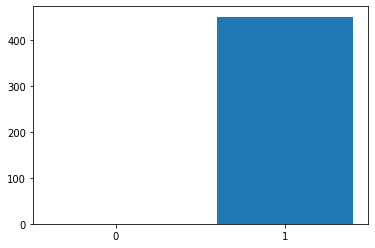

In [68]:



plt.bar(1,cluster_1['offer_label'].value_counts()[1])
plt.bar(0,0)
plt.xticks(range(2))
plt.show()

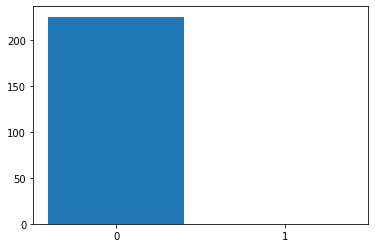

In [71]:
plt.bar(0,cluster_0['offer_label'].value_counts()[0])
plt.bar(1,0)
plt.xticks(range(2))
plt.show()

In [50]:
cluster_0['offer_label'].value_counts()

0    225
Name: offer_label, dtype: int64

In [ ]:
cluster

In [51]:
del cluster_0['Month'] # 차이없음
del cluster_0['Year'] # 차이없음
del cluster_0['first_p']# 차이없음
del cluster_0['cluster']# 의미 x
del cluster_0['range']# 의미 x
del cluster_0['sicho_p']# 차이없음 
# del cluster_0['profit_percent']# 의미x
# del cluster_0['offer_label'] #차이없음
del cluster_0['market_type'] #차이없음


In [52]:

neg_0 = cluster_0[cluster_0['PlusMinusLabel']==0]
pos_0 = cluster_0[cluster_0['PlusMinusLabel']==1]

In [53]:
pos_0

,cor_name,cor_rate,obligation,offer_price,profit_percent,sales,profit,shares_to_pub,sub_rate,score,nasdaq_score,Quater_per,search_amt,offer_label,PlusMinusLabel
2,KPX라이프사이언스,524.80,11.46,6200,22.58,46493.00,6609.0,1.00,252.62,0.41,0.012,0.455,0.063650,0,1
3,아이티엑스시큐리티,1296.00,10.50,6000,23.33,46568.00,4416.0,1.00,413.00,0.22,0.012,0.455,0.063650,0,1
5,승화엘엠씨,18.48,10.86,6700,31.34,29006.00,1818.0,1.00,611.88,0.48,0.000,0.520,-0.026625,0,1
8,스타플렉스,0.92,11.00,15000,4.67,69618.00,4203.0,1.00,216.00,0.75,-0.003,0.520,0.013911,0,1
9,우리넷,54.27,9.00,6700,47.76,38428.00,6449.0,1.00,725.91,0.50,-0.003,0.520,0.052222,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,대명에너지,254.74,1.18,15000,3.00,159386.00,8132.0,0.80,151.58,0.39,0.038,0.300,0.269000,0,1
667,청담글로벌,24.79,16.47,6000,8.33,70387.00,849.0,0.92,42.10,0.27,0.027,0.300,-0.043000,0,1
669,비플라이소프트,111.05,0.76,10000,5.00,24386.00,-3424.0,0.90,26.86,0.58,0.014,0.300,0.110000,0,1
676,루닛,7.10,1.65,30000,2.67,1430.00,-83739.0,1.00,8.99,0.31,0.016,0.600,0.282000,0,1


In [55]:
neg_0

,cor_name,cor_rate,obligation,offer_price,profit_percent,sales,profit,shares_to_pub,sub_rate,score,nasdaq_score,Quater_per,search_amt,offer_label,PlusMinusLabel
0,위메이드엔터테인먼트,1269.00,4.30,62000,-8.06,73850.0,24600.0,1.00,5.63,0.31,-0.012,0.455,0.03267,0,0
6,우노앤컴퍼니,407.00,8.00,6500,-10.00,15677.0,4710.0,1.00,562.95,0.42,0.004,0.520,0.03267,0,0
7,아세아텍,61.70,1.60,4100,-2.80,98114.0,6808.0,1.00,79.21,0.48,0.002,0.520,0.03267,0,0
12,에스이티아이,1283.00,4.75,17500,-10.00,70311.0,10657.0,1.00,52.20,0.19,0.000,0.520,0.03267,0,0
13,차이나하오란리사이클링,11.00,9.48,4700,-7.45,132160.0,10840.0,1.00,42.50,0.16,-0.030,0.520,0.03267,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,스톤브릿지벤처스,20.06,9.48,8000,-10.00,24509.0,12819.0,0.60,22.73,0.60,0.033,0.583,0.27400,0,0
657,노을,31.50,9.48,10000,-3.30,295.0,-8975.0,1.00,8.70,0.14,0.016,0.583,-0.05600,0,0
659,모아데이타,114.19,0.87,20000,-10.00,13785.0,2093.0,1.00,23.39,0.71,0.036,0.583,-0.06200,0,0
671,보로노이,28.35,9.48,40000,-10.00,6180.0,-26491.0,1.00,5.57,0.57,0.016,0.300,0.17600,0,0


In [56]:
cluster_0

,cor_name,cor_rate,obligation,offer_price,profit_percent,sales,profit,shares_to_pub,sub_rate,score,nasdaq_score,Quater_per,search_amt,offer_label,PlusMinusLabel
0,위메이드엔터테인먼트,1269.00,4.30,62000,-8.06,73850.00,24600.0,1.00,5.63,0.31,-0.012,0.455,0.032670,0,0
2,KPX라이프사이언스,524.80,11.46,6200,22.58,46493.00,6609.0,1.00,252.62,0.41,0.012,0.455,0.063650,0,1
3,아이티엑스시큐리티,1296.00,10.50,6000,23.33,46568.00,4416.0,1.00,413.00,0.22,0.012,0.455,0.063650,0,1
5,승화엘엠씨,18.48,10.86,6700,31.34,29006.00,1818.0,1.00,611.88,0.48,0.000,0.520,-0.026625,0,1
6,우노앤컴퍼니,407.00,8.00,6500,-10.00,15677.00,4710.0,1.00,562.95,0.42,0.004,0.520,0.032670,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,비플라이소프트,111.05,0.76,10000,5.00,24386.00,-3424.0,0.90,26.86,0.58,0.014,0.300,0.110000,0,1
671,보로노이,28.35,9.48,40000,-10.00,6180.00,-26491.0,1.00,5.57,0.57,0.016,0.300,0.176000,0,0
676,루닛,7.10,1.65,30000,2.67,1430.00,-83739.0,1.00,8.99,0.31,0.016,0.600,0.282000,0,1
678,에이프릴바이오,14.43,10.66,16000,21.88,153762.78,-10220.0,1.00,4.76,0.62,0.041,0.600,0.185000,0,1
